In [1]:
import os 
import keras

os.environ['CUDA_VISIBLE_DEVICES']=''#範例不使用GPU

Using TensorFlow backend.


In [18]:
(train_x,train_y),(test_x,test_y) = keras.datasets.cifar10.load_data()

In [3]:
#建立函式來前處理資料
def preproc_x(x, flatten = True):
    x = x/255
    if flatten:
        x = x.reshape(len(x),-1)
    return x
def preproc_y(y, num_classes =10):
    if y.shape[-1]==1:
        y = keras.utils.to_categorical(y,num_classes=num_classes)
    return y

In [4]:
train_x = preproc_x(train_x)
test_x = preproc_x(test_x)

train_y = preproc_y(train_y)
test_y = preproc_y(test_y)

In [35]:
# model建立的函式
def build_mpl(input_shape, output_units = 10, num_neurons=[512,256,128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i ==0:
            x = keras.layers.Dense(units = n_units, activation='relu'
                                   , name='hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu'
                                   ,name='hidden_layer'+str(i+1))(x)
    out = keras.layers.Dense(units=output_units, activation='softmax' 
                            ,name = 'output')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
model = build_mpl(input_shape=train_x.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [10]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [11]:
opt = keras.optimizers.Adam(lr = LEARNING_RATE)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

W0925 14:30:43.533873 15452 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\DL\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0925 14:30:43.543846 15452 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\DL\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [12]:
model.fit(train_x,train_y, epochs=EPOCHS, 
          batch_size=BATCH_SIZE, validation_data=(test_x,test_y),
         shuffle=True)

W0925 14:31:44.936965 15452 deprecation.py:323] From C:\Users\User\Anaconda3\envs\DL\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0925 14:31:45.120474 15452 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\DL\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 121us/step - loss: 1.9586 - acc: 0.2937 - val_loss: 1.7719 - val_acc: 0.3665
Epoch 2/100
50000/50000 [==============================] - 5s 108us/step - loss: 1.7277 - acc: 0.3837 - val_loss: 1.6569 - val_acc: 0.4043
Epoch 3/100
50000/50000 [==============================] - 5s 107us/step - loss: 1.6409 - acc: 0.4153 - val_loss: 1.6122 - val_acc: 0.4256
Epoch 4/100
50000/50000 [==============================] - 5s 105us/step - loss: 1.5603 - acc: 0.4447 - val_loss: 1.5609 - val_acc: 0.4434
Epoch 5/100
50000/50000 [==============================] - 5s 106us/step - loss: 1.5208 - acc: 0.4591 - val_loss: 1.5393 - val_acc: 0.4498
Epoch 6/100
50000/50000 [==============================] - 5s 108us/step - loss: 1.4734 - acc: 0.4758 - val_loss: 1.5585 - val_acc: 0.4425
Epoch 7/100
50000/50000 [==============================] - 5s 109us/step - loss: 1.4539 - acc: 0.4809 - val_loss: 1.

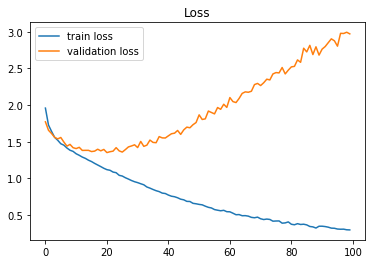

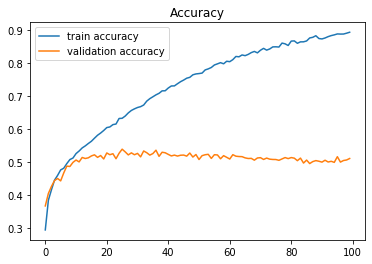

In [16]:
import matplotlib.pyplot as plt

train_loss = model.history.history['loss']
valid_loss = model.history.history['val_loss']

train_acc = model.history.history['acc']
valid_acc = model.history.history['val_acc']

plt.plot(range(len(train_loss)),train_loss, label = 'train loss')
plt.plot(range(len(valid_loss)),valid_loss, label = 'validation loss')
plt.legend()
plt.title('Loss')
plt.show()

plt.plot(range(len(train_acc)),train_acc, label = 'train accuracy')
plt.plot(range(len(valid_acc)),valid_acc, label = 'validation accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [40]:
# set GPU
#https://blog.csdn.net/byron123456sfsfsfa/article/details/79811286
import tensorflow as tf

gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.Session(config=tf.ConfigProto(gpu_options= gpu_options))

tf.keras.backend.set_session(sess)

In [29]:
(train_x,train_y),(test_x,test_y) = keras.datasets.cifar10.load_data()

In [30]:
#建立函式來前處理資料
def preproc_x(x, flatten = True):
    x = -1+(x-x.min())/(x.max()-x.min())*2
    if flatten:
        x = x.reshape(len(x),-1)
    return x
def preproc_y(y, num_classes =10):
    if y.shape[-1]==1:
        y = keras.utils.to_categorical(y,num_classes=num_classes)
    return y

In [31]:
train_x = preproc_x(train_x)
test_x = preproc_x(test_x)

train_y = preproc_y(train_y)
test_y = preproc_y(test_y)

In [36]:
model = build_mpl(input_shape=train_x.shape[1:], num_neurons=[512,256,128,64,128,256,512])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               8320      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 256)               33024     
__________

In [37]:
opt = keras.optimizers.Adam(lr = LEARNING_RATE)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256
model.fit(train_x,train_y, epochs=EPOCHS, 
          batch_size=BATCH_SIZE, validation_data=(test_x,test_y),
         shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 140us/step - loss: 1.7225 - acc: 0.3833 - val_loss: 1.5637 - val_acc: 0.4484
Epoch 2/100
50000/50000 [==============================] - 6s 123us/step - loss: 1.4897 - acc: 0.4716 - val_loss: 1.4579 - val_acc: 0.4782
Epoch 3/100
50000/50000 [==============================] - 7s 134us/step - loss: 1.3685 - acc: 0.5192 - val_loss: 1.3950 - val_acc: 0.5049
Epoch 4/100
50000/50000 [==============================] - 6s 126us/step - loss: 1.2723 - acc: 0.5505 - val_loss: 1.4076 - val_acc: 0.5093
Epoch 5/100
50000/50000 [==============================] - 7s 133us/step - loss: 1.1941 - acc: 0.5775 - val_loss: 1.3625 - val_acc: 0.5199
Epoch 6/100
50000/50000 [==============================] - 6s 124us/step - loss: 1.1236 - acc: 0.6027 - val_loss: 1.3509 - val_acc: 0.5335
Epoch 7/100
50000/50000 [==============================] - 6s 122us/step - loss: 1.0495 - acc: 0.6279 - val_loss: 1.

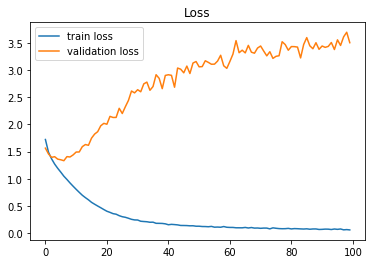

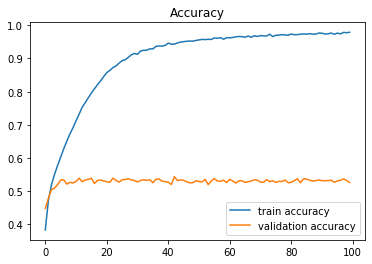

In [39]:
import matplotlib.pyplot as plt

train_loss = model.history.history['loss']
valid_loss = model.history.history['val_loss']

train_acc = model.history.history['acc']
valid_acc = model.history.history['val_acc']

plt.plot(range(len(train_loss)),train_loss, label = 'train loss')
plt.plot(range(len(valid_loss)),valid_loss, label = 'validation loss')
plt.legend()
plt.title('Loss')
plt.show()

plt.plot(range(len(train_acc)),train_acc, label = 'train accuracy')
plt.plot(range(len(valid_acc)),valid_acc, label = 'validation accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()